Project Description
Unlock the secrets of flight delays and cancellations with data analysis! Dive into the world of aviation data to identify key factors and airlines most affected by disruptions in the Pacific Northwest by using your data wrangling, data visualization, and exploratory data analysis skills.

Project Instructions
Which airlines and routes (for example "PDX-SFO") are most affected by flight delays, and what impact does wind have on departure delays?
Load the two CSV files into separate DataFrames. Explore the data and create any new columns that might benefit your analysis.
For routes, calculate the average departure delays and highest number of canceled flights and store this as a DataFrame called routes_delays_cancels, resetting the index after calculating.
For airlines, determine the average departure delays and the highest number of canceled flights and store this as a DataFrame called airlines_delays_cancels, resetting the index after calculating.
Produce two bar graphs to show (1) the top 9 highest number of cancellations by route in a plot called top9_route_cancels_bar and (2) the top 9 highest average departure delays by airline in a plot called top9_airline_delays_bar.
Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX, setting wind_response to True if so and False if not.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reading data

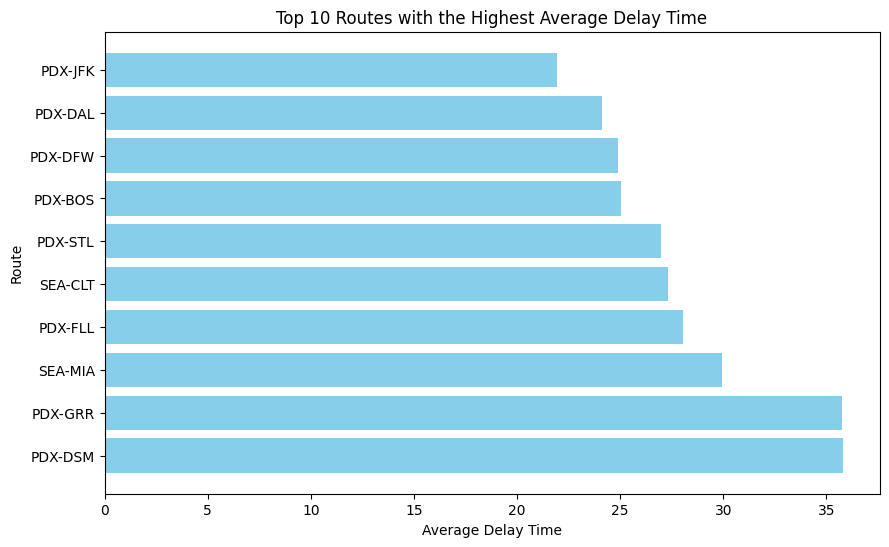

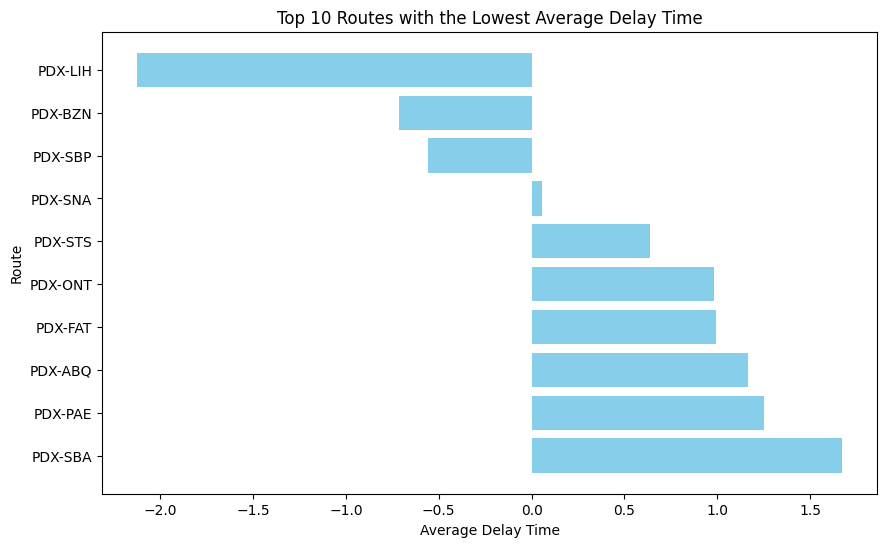

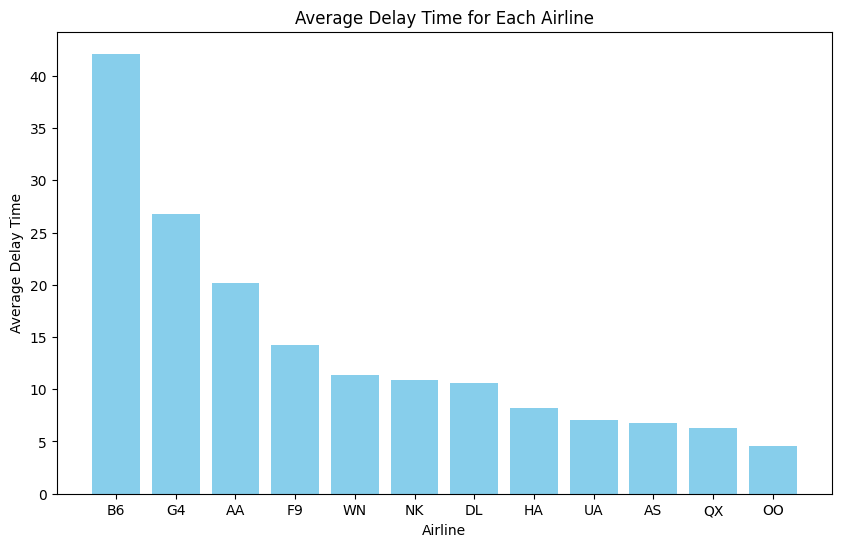

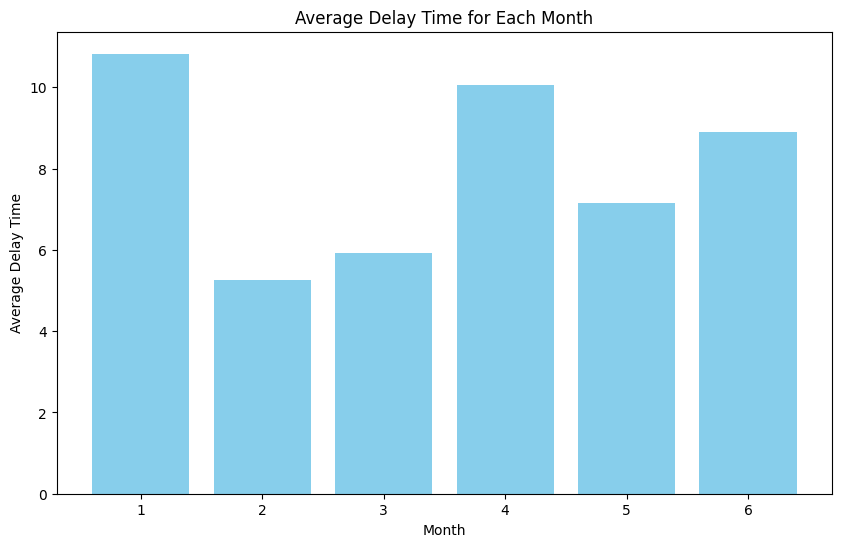

Text(0.5, 1.0, 'Average Delay Time for Each Day of the Week')

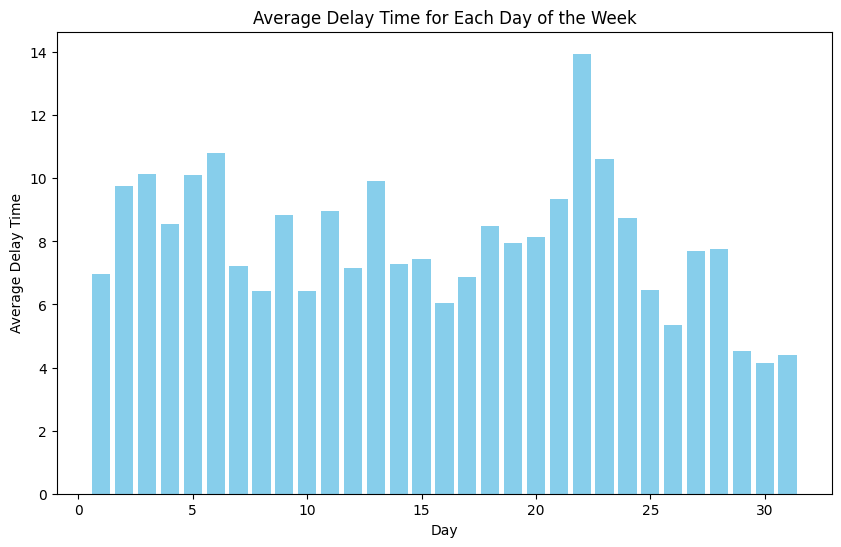

In [3]:
flight = pd.read_csv('flights.csv')
flights_weather = pd.read_csv('flights_weather.csv')


#Route in between the two airports
flight['route'] = flight['origin'] + '-' + flight['dest']
flights_weather['route'] = flights_weather['origin'] + '-' + flights_weather['dest']

#MAverage delay time for each route
mean_delay = flights_weather.groupby('route')['dep_delay'].mean()
mean_delay = mean_delay.reset_index()
mean_delay.columns = ['route', 'mean_delay']
mean_delay = mean_delay.sort_values('mean_delay', ascending=False)

#Top 10 routes with the highest average delay time
top10 = mean_delay.head(10)
top10 = top10.reset_index(drop=True)

#Plot the top 10 routes with the highest average delay time
plt.figure(figsize=(10, 6))
plt.barh(top10['route'], top10['mean_delay'], color='skyblue')
plt.xlabel('Average Delay Time')
plt.ylabel('Route')
plt.title('Top 10 Routes with the Highest Average Delay Time')
plt.show()

#Top 10 routes with the lowest average delay time
bottom10 = mean_delay.tail(10)
bottom10 = bottom10.reset_index(drop=True)

#Plot the top 10 routes with the lowest average delay time
plt.figure(figsize=(10, 6))
plt.barh(bottom10['route'], bottom10['mean_delay'], color='skyblue')
plt.xlabel('Average Delay Time')
plt.ylabel('Route')

plt.title('Top 10 Routes with the Lowest Average Delay Time')
plt.show()

#Average delay time for each airline
mean_delay_airline = flights_weather.groupby('carrier')['dep_delay'].mean()
mean_delay_airline = mean_delay_airline.reset_index()
mean_delay_airline.columns = ['carrier', 'mean_delay']
mean_delay_airline = mean_delay_airline.sort_values('mean_delay', ascending=False)

#Plot the average delay time for each airline
plt.figure(figsize=(10, 6))
plt.bar(mean_delay_airline['carrier'], mean_delay_airline['mean_delay'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Average Delay Time')
plt.title('Average Delay Time for Each Airline')

plt.show()

#Average delay time for each month
mean_delay_month = flights_weather.groupby('month')['dep_delay'].mean()
mean_delay_month = mean_delay_month.reset_index()
mean_delay_month.columns = ['month', 'mean_delay']
mean_delay_month = mean_delay_month.sort_values('mean_delay', ascending=False)

#Plot the average delay time for each month
plt.figure(figsize=(10, 6))
plt.bar(mean_delay_month['month'], mean_delay_month['mean_delay'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Delay Time')
plt.title('Average Delay Time for Each Month')

plt.show()

#Average delay time for each day of the week

mean_delay_day = flights_weather.groupby('day')['dep_delay'].mean()
mean_delay_day = mean_delay_day.reset_index()
mean_delay_day.columns = ['day', 'mean_delay']
mean_delay_day = mean_delay_day.sort_values('mean_delay', ascending=False)

#Plot the average delay time for each day of the week
plt.figure(figsize=(10, 6))

plt.bar(mean_delay_day['day'], mean_delay_day['mean_delay'], color='skyblue')
plt.xlabel('Day')
plt.ylabel('Average Delay Time')
plt.title('Average Delay Time for Each Day of the Week')


